In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import statistics
from scipy import stats
from scipy.stats import shapiro
import statsmodels.stats.api as sms
from helpers.help_ogi_intro import basic_analysis, outlier_thresholds,ogi_AB, is_any_outlier


In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [7]:
control_data = pd.read_excel("ab_testing_data.xlsx", sheet_name="Control Group")
test_data = pd.read_excel("ab_testing_data.xlsx", sheet_name="Test Group")


In [8]:
control_data["Group"] = "A"
test_data["Group"] = "B"

is_any_outlier(control_data, "Purchase")
is_any_outlier(test_data, "Purchase")
control_data.head()
test_data.head()

Dataset has no outliers.
Dataset has no outliers.


,Impression,Click,Purchase,Earning,Group
0,120103.50380,3216.54796,702.16035,1939.61124,B
1,134775.94336,3635.08242,834.05429,2929.40582,B
2,107806.62079,3057.14356,422.93426,2526.24488,B
3,116445.27553,4650.47391,429.03353,2281.42857,B
4,145082.51684,5201.38772,749.86044,2781.69752,B


## 1. Confidence Interval

In [9]:
sms.DescrStatsW(control_data["Purchase"]).tconfint_mean()
sms.DescrStatsW(test_data["Purchase"]).tconfint_mean()

(530.5670226990063, 633.645170597929)

## 2. AB Testing 

### 2.1. Assumption Control

#### 2.1.1 Normality assumption

In [10]:
# H0: Normal distribution assumption is provided.
# H1: Normal distribution assumption cannot be achieved.
AB_test = control_data.append(test_data)
test_statistics, pvalue = shapiro(AB_test.loc[AB_test["Group"] == "A", "Purchase"])
print('Test Statistics is  %.4f, p-value = %.4f' % (test_statistics, pvalue))
#Test Statistics = 0.9773, p-value = 0.5891

Test Statistics is  0.9773, p-value = 0.5891


In [11]:
# If the p-value < 0.05, H0 is rejected.
# If the p-value > 0.05, H0 can not be rejected.

In [12]:
test_statistics, pvalue = shapiro(AB_test.loc[AB_test["Group"] == "B", "Purchase"])
print('Test Statistics is  %.4f, p-value = %.4f' % (test_statistics, pvalue))
# Test Statistics = 0.9589, p-value = 0.1541

Test Statistics is  0.9589, p-value = 0.1541


In [13]:
# In our A and B groups, H0 was not rejected because our p-value was not less than 0.05.
# Therefore, the assumption of normal distribution is provided.

#### 2.1.2 Variance Homogeneity

In [14]:
# H0: Variances Are Homogeneous
# H1: Variances Are Not Homogeneous


stats.levene(AB_test.loc[AB_test["Group"] == "A", "Purchase"],
             AB_test.loc[AB_test["Group"] == "B", "Purchase"])

#LeveneResult(statistic=2.6392694728747363, pvalue=0.10828588271874791)
# H0 was not rejected because the p-value was not less than 0.05.
# Variances are homogeneous.

LeveneResult(statistic=2.6392694728747363, pvalue=0.10828588271874791)

## 2. Application of the Hypothesis

In [15]:
# Independent two-sample t test if assumptions are provided (parametric test)
# H0: M1 = M2 (There is no statistically significant difference between the two group averages.)

# H1: M1! = M2 (There is a statistically significant difference between the two group averages)

# H0 Rejected if p-value <0.05.
# If p-value> 0.05, H0 Cannot be denied.

test_statistics, pvalue = stats.ttest_ind(AB_test.loc[AB_test["Group"] == "A", "Purchase"],
                                           AB_test.loc[AB_test["Group"] == "B", "Purchase"],
                                           equal_var=True)
print('Test Statistics is  %.4f, p-value is %.4f' % (test_statistics, pvalue))



Test Statistics is  -0.9416, p-value is 0.3493


In [16]:
# Test Statistics = -0.9416, p-value = 0.3493
# H0 was not rejected because the p value was not less than 0.05.

# BONUS 

In [17]:
control_data['purchase_per_click'] = control_data["Click"]/control_data["Impression"]
test_data['purchase_per_click'] = test_data["Click"]/test_data["Impression"]

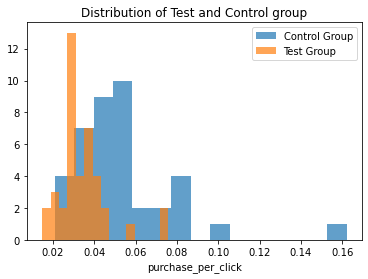

P value for A data = 0.000, P value for B data = 0.000 

##################################################
With that situations we have to check our methods 

Our p values obtained from the Shapiro Wilk test were less than 5%. This shows that we should reject H0. Accordingly distribution of  purchase_per_click  values in  A and B are not likely to normal distribution. 


Since our Shapiro Wilk test results we need to apply MannWhitney U Test for  purchase_per_click 


U value is 292.000, MannWhitney U Test p value is 0.000 


Our p value from the Mann Whitney U Test is less than 5%(0.05). This shows that we can reject H0.  Thus, with this result, we can say that there is a significant difference between A and B in purchase_per_click variable. 


Median of B Earning in  purchase_per_click  is greater than A Earning 




In [18]:
ogi_AB(control_data,test_data, "purchase_per_click")